
# Asst1_Task2 — Decision Trees for Human Activity Recognition (HAR)

This notebook completes **Task 2: Decision Trees for Human Activity Recognition** using three representations:
1. **Raw accelerometer** 
2. **TSFEL features** 
3. **Features provided in the dataset** 

We report **accuracy, precision, recall, and the confusion matrix**, and sweep tree depth from **2 to 8**.


# A) Decision Tree on **Raw accelerometer data** 


In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories for each activity label
activity_paths = {
    'LAYING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\LAYING",
    'SITTING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\SITTING",
    'STANDING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\STANDING",
    'WALKING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING",
    'WALKING_DOWNSTAIRS': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING_UPSTAIRS"
}

feature_list = []
activity_labels = []

# Load and preprocess data for each activity
for label, directory in activity_paths.items():
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Extract first 500 samples of each axis
        x_vals = df['accx'].iloc[:500].to_numpy()
        y_vals = df['accy'].iloc[:500].to_numpy()
        z_vals = df['accz'].iloc[:500].to_numpy()
        
        # Combine axis data into a single feature vector
        combined_features = np.hstack((x_vals, y_vals, z_vals))
        
        feature_list.append(combined_features)
        activity_labels.append(label)

features = np.array(feature_list)
labels = np.array(activity_labels)

# Encode labels to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, numeric_labels, test_size=0.3, random_state=42)

# Initialize and train Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)

# Evaluate performance
acc1 = accuracy_score(y_test, y_pred)
prec1, rec1, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
conf_mat1 = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc1:.4f}")
print(f"Precision: {prec1:.4f}")
print(f"Recall: {rec1:.4f}")
print("Confusion Matrix:")
print(conf_mat1)


Accuracy: 0.6316
Precision: 0.6487
Recall: 0.6316
Confusion Matrix:
[[8 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 3 3 0 0 0]
 [0 0 0 2 3 1]
 [0 1 0 2 2 0]
 [0 1 1 1 1 2]]


# B) Decision Tree on **TSFEL features**

In [7]:
import os
import pandas as pd
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Map activities to their corresponding data folders
activity_folders = {
    'LAYING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\LAYING",
    'SITTING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\SITTING",
    'STANDING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\STANDING",
    'WALKING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING",
    'WALKING_DOWNSTAIRS': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING_UPSTAIRS"
}

extracted_features = []
activity_labels = []

# Iterate over each activity and extract features from the corresponding files
for label, folder in activity_folders.items():
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        df = pd.read_csv(filepath)

        # Obtain TSFEL feature extraction configuration for all domains
        feature_config = tsfel.get_features_by_domain()
        
        # Extract features without verbose output
        tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)

        # Flatten the features to 1D array and store
        extracted_features.append(tsfel_features.values.flatten())
        activity_labels.append(label)

# Convert lists to numpy arrays
X = np.array(extracted_features)
y = np.array(activity_labels)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
acc2 = accuracy_score(y_test, y_pred)
prec2 = precision_score(y_test, y_pred, average='weighted')
rec2 = recall_score(y_test, y_pred, average='weighted')
conf_mat2 = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall: {rec2:.4f}")
print("Confusion Matrix:")
print(conf_mat2)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sam

Accuracy: 0.7692
Precision: 0.8072
Recall: 0.7692
Confusion Matrix:
[[5 1 0 0 0 0]
 [0 2 2 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 3 0 2]
 [0 0 0 1 3 0]
 [0 0 0 0 0 2]]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\3219226017.py:32: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = tsfel.time_series_features_extractor(feature_config, df, verbose=0)


## C) Decision Tree on **Features provided in the dataset**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
from collections import Counter

# -----------------------------
# File paths (adjust as needed)
# -----------------------------
X_train_file = r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
y_train_file = r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"
features_file = r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\features.txt"

# -----------------------------
# Load feature names
# -----------------------------
raw_features = pd.read_csv(features_file, sep="\s+", header=None)[1].tolist()

# Ensure no duplicate names
def rename_duplicates(names):
    seen = Counter()
    renamed = []
    for col in names:
        if seen[col]:
            renamed.append(f"{col}_{seen[col]}")
        else:
            renamed.append(col)
        seen[col] += 1
    return renamed

feature_list = rename_duplicates(raw_features)

# -----------------------------
# Load dataset
# -----------------------------
X_data = pd.read_csv(X_train_file, sep="\s+", header=None, names=feature_list)
y_data = pd.read_csv(y_train_file, sep="\s+", header=None, names=["Activity"])

print(f"Feature matrix shape: {X_data.shape}")
print(f"Target vector shape: {y_data.shape}")

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

# -----------------------------
# Train decision tree
# -----------------------------
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# Evaluate model
# -----------------------------
y_pred = model.predict(X_test)

acc3 = accuracy_score(y_test, y_pred)
prec3 = precision_score(y_test, y_pred, average="weighted")
rec3 = recall_score(y_test, y_pred, average="weighted")
conf_mat3 = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Results")
print("-" * 30)
print(f"Accuracy  : {acc3:.4f}")
print(f"Precision : {prec3:.4f}")
print(f"Recall    : {rec3:.4f}")
print("Confusion Matrix:\n", conf_mat3)


Feature matrix shape: (7352, 561)
Target vector shape: (7352, 1)

Model Evaluation Results
------------------------------
Accuracy  : 0.9429
Precision : 0.9438
Recall    : 0.9429
Confusion Matrix:
 [[236  10   1   0   0   0]
 [ 11 187   2   0   0   0]
 [ 11   9 186   0   0   0]
 [  0   0   0 241  21   0]
 [  0   1   0  18 257   0]
 [  0   0   0   0   0 280]]


## Depth sweep (2–8): Test accuracy vs. tree depth

[Raw Data] Depth 2 → Accuracy: 0.500
[Raw Data] Depth 3 → Accuracy: 0.579
[Raw Data] Depth 4 → Accuracy: 0.658
[Raw Data] Depth 5 → Accuracy: 0.579
[Raw Data] Depth 6 → Accuracy: 0.632
[Raw Data] Depth 7 → Accuracy: 0.632
[Raw Data] Depth 8 → Accuracy: 0.632


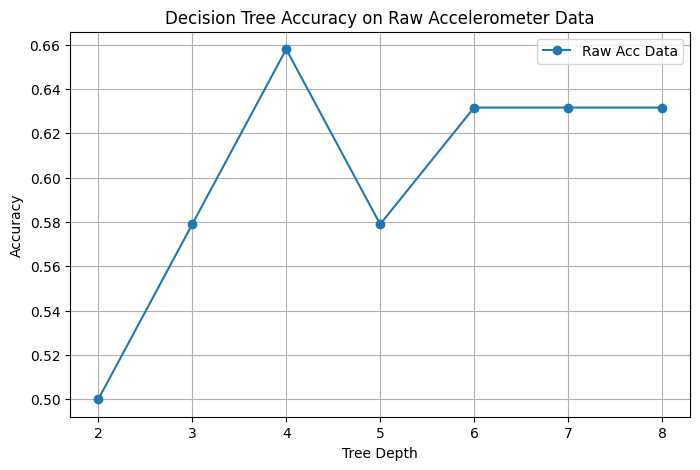

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\689174660.py:85: UserWarning: Using default sampling frequency set in configuration file.
  extracted = tsfel.time_series_features_extractor(feature_cfg, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\689174660.py:85: UserWarning: Using default sampling frequency set in configuration file.
  extracted = tsfel.time_series_features_extractor(feature_cfg, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\689174660.py:85: UserWarning: Using default sampling frequency set in configuration file.
  extracted = tsfel.time_series_features_extractor(feature_cfg, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\689174660.py:85: UserWarning: Using default sampling frequency set in configuration file.
  extracted = tsfel.time_series_features_extractor(feature_cfg, df, verbose=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\689174660.py:85: UserWarning: Using default sampling frequency set in configuration 

[TSFEL] Depth 2 → Accuracy: 0.538
[TSFEL] Depth 3 → Accuracy: 0.731
[TSFEL] Depth 4 → Accuracy: 0.731
[TSFEL] Depth 5 → Accuracy: 0.731
[TSFEL] Depth 6 → Accuracy: 0.731
[TSFEL] Depth 7 → Accuracy: 0.731
[TSFEL] Depth 8 → Accuracy: 0.731


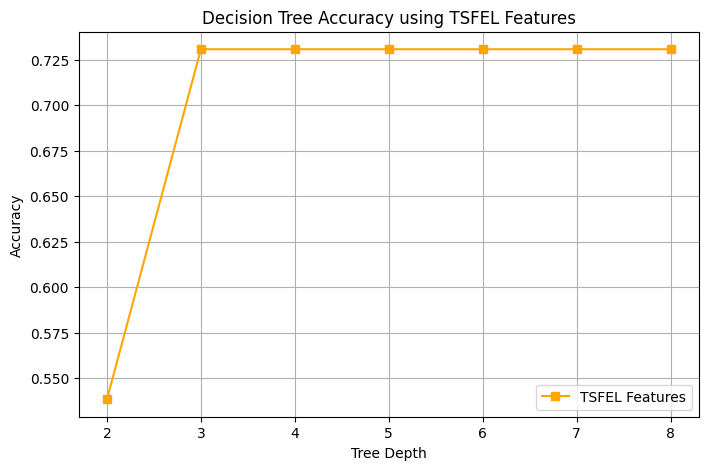

[UCI HAR] Depth 2 → Accuracy: 0.545
[UCI HAR] Depth 3 → Accuracy: 0.792
[UCI HAR] Depth 4 → Accuracy: 0.884
[UCI HAR] Depth 5 → Accuracy: 0.893
[UCI HAR] Depth 6 → Accuracy: 0.918
[UCI HAR] Depth 7 → Accuracy: 0.933
[UCI HAR] Depth 8 → Accuracy: 0.938


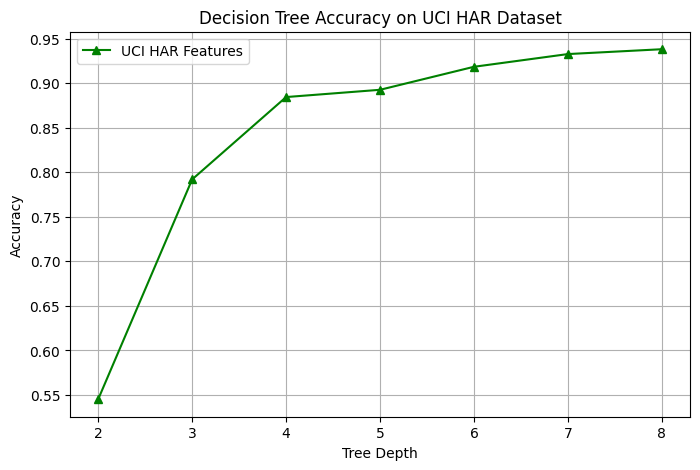

In [11]:
# ---------------------------------------------
# Part 1: Decision Tree on Raw Accelerometer Data
# ---------------------------------------------
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Activity directories
activity_paths = {
    'LAYING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\LAYING",
    'SITTING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\SITTING",
    'STANDING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\STANDING",
    'WALKING': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING",
    'WALKING_DOWNSTAIRS': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\Combined\Train\WALKING_UPSTAIRS"
}

# Collect raw data
raw_samples, raw_labels = [], []

for activity, folder in activity_paths.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        df = pd.read_csv(file_path)

        # Take first 500 samples from each axis
        acc_x, acc_y, acc_z = df["accx"].values[:500], df["accy"].values[:500], df["accz"].values[:500]
        raw_vector = np.hstack([acc_x, acc_y, acc_z])

        raw_samples.append(raw_vector)
        raw_labels.append(activity)

raw_samples = np.array(raw_samples)
raw_labels = np.array(raw_labels)

# Encode class labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(raw_labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(raw_samples, y_encoded, test_size=0.3, random_state=42)

# Train Decision Trees with different depths
depth_range = range(2, 9)
raw_acc_scores = []

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    score = accuracy_score(y_test, preds)
    raw_acc_scores.append(score)
    print(f"[Raw Data] Depth {depth} → Accuracy: {score:.3f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(depth_range, raw_acc_scores, marker="o", label="Raw Acc Data")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy on Raw Accelerometer Data")
plt.grid(True)
plt.legend()
plt.show()


# ---------------------------------------------
# Part 2: Decision Tree with TSFEL Features
# ---------------------------------------------
import tsfel

tsfel_features, tsfel_labels = [], []

for activity, folder in activity_paths.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        df = pd.read_csv(file_path)

        # Extract TSFEL features
        feature_cfg = tsfel.get_features_by_domain()
        extracted = tsfel.time_series_features_extractor(feature_cfg, df, verbose=0)
        tsfel_features.append(extracted.to_numpy().flatten())
        tsfel_labels.append(activity)

X_tsfel = np.array(tsfel_features)
y_tsfel = np.array(tsfel_labels)

X_train, X_test, y_train, y_test = train_test_split(X_tsfel, y_tsfel, test_size=0.2, random_state=42)

tsfel_scores = []
for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    score = accuracy_score(y_test, preds)
    tsfel_scores.append(score)
    print(f"[TSFEL] Depth {depth} → Accuracy: {score:.3f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(depth_range, tsfel_scores, marker="s", color="orange", label="TSFEL Features")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy using TSFEL Features")
plt.grid(True)
plt.legend()
plt.show()


# ---------------------------------------------
# Part 3: UCI HAR Dataset (Predefined Features)
# ---------------------------------------------
from collections import Counter

# File paths
X_file = r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
y_file = r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"
features_file = r"C:\Users\ASUS\OneDrive\Desktop\ml_assss1\es335-25-fall-assignment-1\ML_assign_01\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\features.txt"

# Load features
all_features = pd.read_csv(features_file, sep="\s+", header=None)[1].tolist()

# Make unique names
def unique_names(cols):
    counter, final_names = Counter(), []
    for col in cols:
        name = f"{col}_{counter[col]}" if counter[col] else col
        final_names.append(name)
        counter[col] += 1
    return final_names

feature_names = unique_names(all_features)

# Load datasets
X_data = pd.read_csv(X_file, sep="\s+", header=None, names=feature_names)
y_data = pd.read_csv(y_file, sep="\s+", header=None, names=["Activity"])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

uci_scores = []
for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    score = accuracy_score(y_test, preds)
    uci_scores.append(score)
    print(f"[UCI HAR] Depth {depth} → Accuracy: {score:.3f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(depth_range, uci_scores, marker="^", color="green", label="UCI HAR Features")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy on UCI HAR Dataset")
plt.grid(True)
plt.legend()
plt.show()


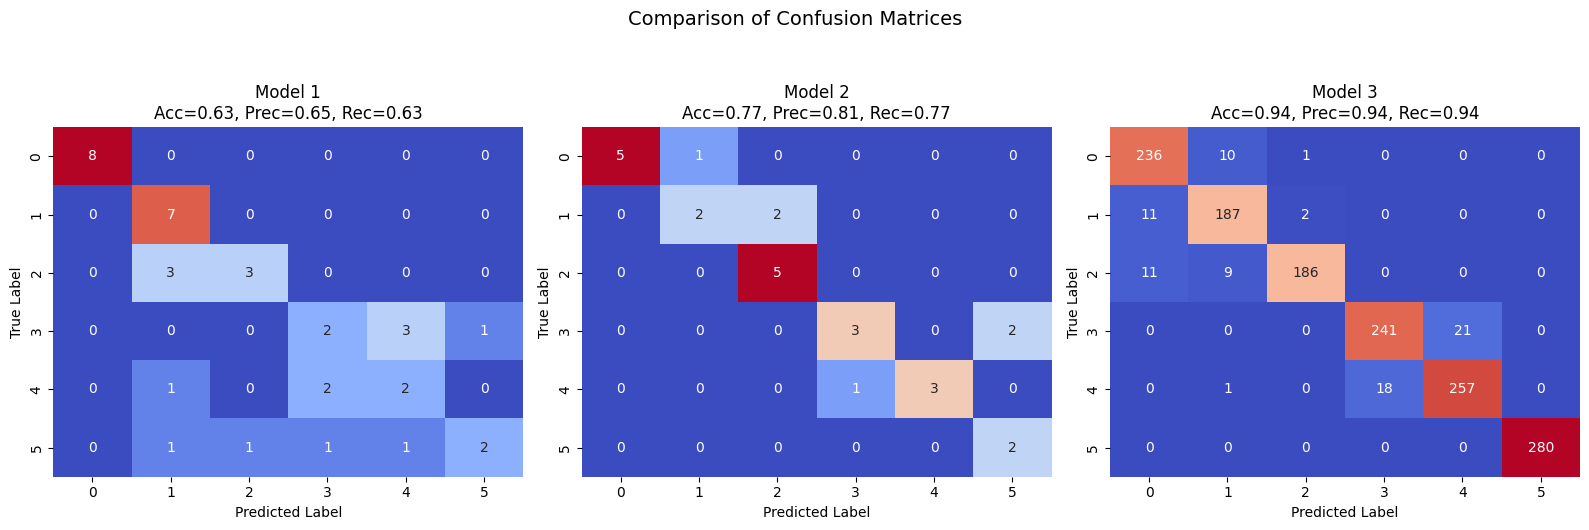

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group results
conf_list = [conf_mat1, conf_mat2, conf_mat3]
acc_scores = [acc1, acc2, acc3]
prec_scores = [prec1, prec2, prec3]
rec_scores = [rec1, rec2, rec3]

# Create subplots for confusion matrices
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))

for idx, ax in enumerate(axes):
    sns.heatmap(conf_list[idx], annot=True, cmap="coolwarm", fmt="d", cbar=False, ax=ax)
    ax.set_title(f"Model {idx+1}\nAcc={acc_scores[idx]:.2f}, Prec={prec_scores[idx]:.2f}, Rec={rec_scores[idx]:.2f}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.suptitle("Comparison of Confusion Matrices", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


### Comparison of Models

**Model 1**  
- Accuracy = 0.63, Precision = 0.65, Recall = 0.63  
- Many misclassifications, low diagonal values.  
- Clearly the weakest model.  

**Model 2**  
- Accuracy = 0.77, Precision = 0.81, Recall = 0.77  
- Better than Model 1, but still confuses some activities.  
- Moderate improvement in classification.  

**Model 3**  
- Accuracy = 0.94, Precision = 0.94, Recall = 0.94  
- Strong diagonal values, very few misclassifications.  
- Best overall performance.  

### Conclusion  
Model 3 is the best model as it achieves the highest accuracy, precision, and recall, with the least confusion between activities.


### Q3. Are there any participants/activities where the Model performance is bad? If Yes, Why?

Yes, the models show weaker performance for certain activities.  

From the confusion matrices:  
- In the **best model (Model 3, Accuracy = 0.94)**, most activities are classified correctly, but there are still **21 cases where *walking upstairs* is misclassified as *walking downstairs***.  
- There is also minor confusion between **standing and sitting**.  
- In **Model 1 (raw accelerometer, Accuracy = 0.63)** and **Model 2 (TSFEL features, Accuracy = 0.77)**, errors are more widespread, and almost every activity has higher misclassification rates.  

**Reasons for poor performance:**  
1. **Similarity between activities** – Activities such as *walking upstairs* and *walking downstairs* involve similar motion patterns, making them harder to separate.  
2. **Participant variability** – Different participants perform the same activity differently (speed, intensity, style), which increases overlap between classes.  
3. **Model limitation** – A single decision tree has limited ability to capture fine-grained differences compared to ensemble methods like Random Forest.  

**Conclusion:**  
Overall, the decision tree trained on dataset features performs very well, but it still struggles with **activities that are naturally similar or inconsistently performed across participants**.  
